In [1]:
import os
import sys
path_home = os.path.expanduser('~')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fontSz = 15
fontsz = 13

%config InlineBackend.figure_format = 'retina'
sys.path.insert(1, '/Library/TeX/texbin')

# to use LaTex font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
# df = pd.read_csv(path_home+'/Documents/git/PaoloCremo.github.io/files/Activities.csv')#, sep=',', index_col=0)
df = pd.read_csv(path_home+'/Downloads/Activities.csv')#, sep=',', index_col=0)
df.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2024-07-10 17:46:41,False,Palma - W06D3-Intervals,6.86,399,00:39:10,147.0,178.0,139,...,NaN,NaN:NaN,No,00:01:00.4,14,NaN,00:38:37,00:39:10,2,14
1,Running,2024-07-09 18:36:22,False,Palma - W06D2-Easy Run,5.11,337,00:33:01,138.0,156.0,147,...,NaN,NaN:NaN,No,00:03:01.1,6,NaN,00:32:49,00:33:01,-9,-3
2,Running,2024-07-07 18:02:56,False,Palma - W05D7-Long Run,14.14,839,01:33:01,136.0,147.0,149,...,NaN,NaN:NaN,No,00:03:01.1,15,NaN,01:32:50,01:34:45,-17,-1
3,Running,2024-07-06 17:39:12,False,Palma - W05D6-Hills,7.12,437,00:40:14,152.0,179.0,141,...,NaN,NaN:NaN,No,00:01:00.5,11,NaN,00:40:11,00:41:23,-2,10
4,Running,2024-07-04 19:31:18,False,Palma - W05D4a-Easy Run,5.93,397,00:37:00,141.0,154.0,151,...,NaN,NaN:NaN,No,00:00:53.7,7,NaN,00:36:58,00:46:46,-10,-4


__find all corse__

In [3]:
ic = []
for i in df.index:
    # if 'Corsa' in df['Tipo di attività'][i]:
    if 'Running' in df['Activity Type'][i]:
        ic.append(i)

ib = []
for i in df.index:
    if 'Cycling' in df['Activity Type'][i]:
        ib.append(i)

__sum distances__

In [4]:
sb = []
sr = []
for i in ib:
    sb.append(sum(df.loc[ib].loc[i:].Distance))

for i in ic:
    sr.append(sum(df.loc[ic].loc[i:].Distance))

__plot__

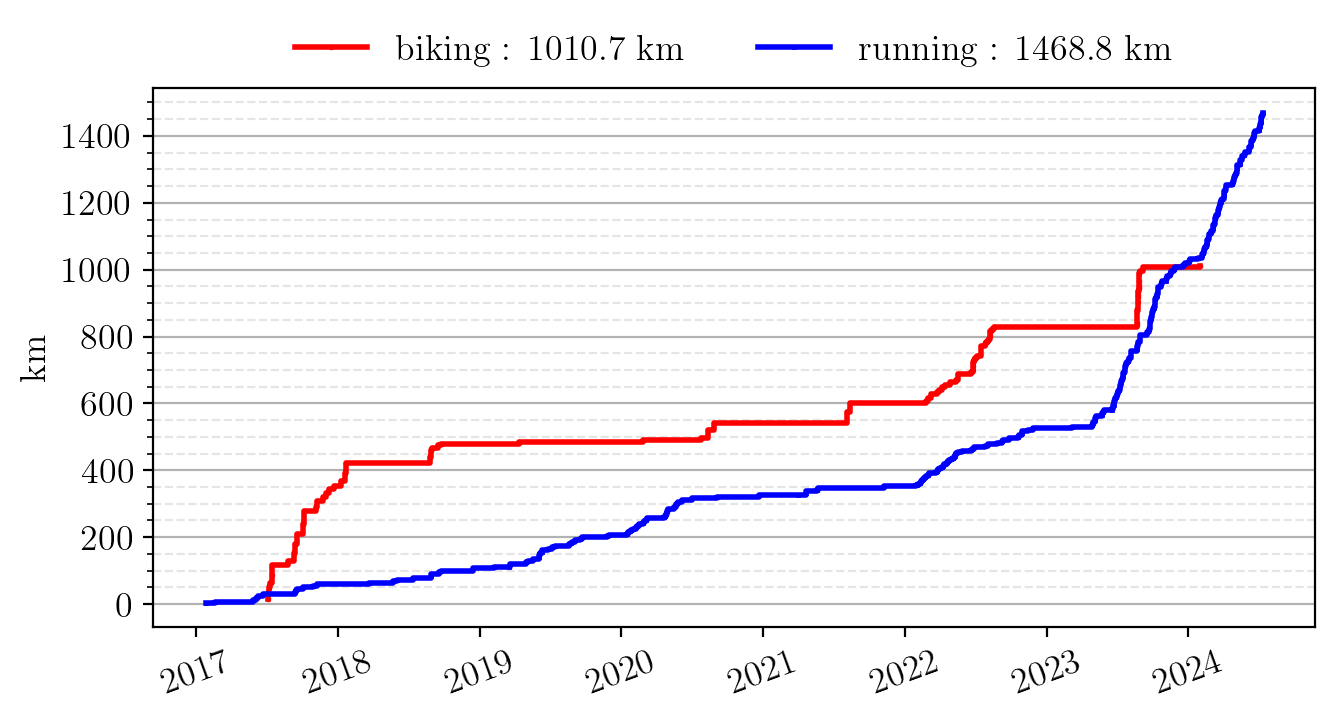

In [5]:
lw = 2
ms = 1

fig, ax = plt.subplots(1,1,figsize=(7.5,3.5))

plt.step([pd.to_datetime(i) for i in df.loc[ib].Date], sb, linewidth=lw, c='r', marker='8', markersize=ms, label='biking  : %.1f km'%(sb[0])) # marker='8', markersize=ms, 
plt.step([pd.to_datetime(i) for i in df.loc[ic].Date], sr, linewidth=lw, c='b', marker='s', markersize=ms, label='running : %.1f km'%(sr[0])) # marker='s', markersize=ms, 
plt.xticks(rotation=20)

plt.ylabel('km', fontsize=fontsz)
plt.legend(ncol=2, framealpha=0., prop={'family': 'monospace', 'size':fontsz}, loc='lower center', bbox_to_anchor=(0.5, .98))
plt.tick_params(axis='both',which='both',direction='out',labelsize=fontsz)

minor_ticks = np.arange(0, round(max(sb[0],sr[0]),-2)+1, 50)
ax.set_yticks(minor_ticks, minor=True)
major_t = np.arange(0, round(max(sb[0],sr[0]),-2)+1, 200)
ax.set_yticks(major_t)
plt.grid(which='minor', linestyle='--', alpha=0.1, c='k', axis='y')
plt.grid(which='major', alpha=0.3, c='k', axis='y')

path_fig = path_home+'/Documents/git/PaoloCremo.github.io/images/rnb.jpg'
# plt.savefig(path_fig, dpi=300, format='png', bbox_inches="tight", transparent=True)
plt.show()